<a href="https://colab.research.google.com/github/reidzf8/Kuliah/blob/main/DataMining/UTS-DATAMAINING/UTS_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Eksplorasi Awal
- a. Berapa jumlah total penumpang dalam data
- b. Berapa jumlah penumpang yang selamat dan tidak selamat? tampilkan dalam bentuk tabel dan grafik

In [3]:
# a. Berapa jumlah total penumpang dalam data
total_penumpang = len(df)
print(f"Jumlah total penumpang: {total_penumpang}")

Jumlah total penumpang: 891


In [4]:
# b. Berapa jumlah penumpang yang selamat dan tidak selamat? tampilkan dalam bentuk tabel dan grafik
# jumlah penumpang
survival_counts = df['Survived'].value_counts()
survival_counts

,count
Survived,
0,549
1,342


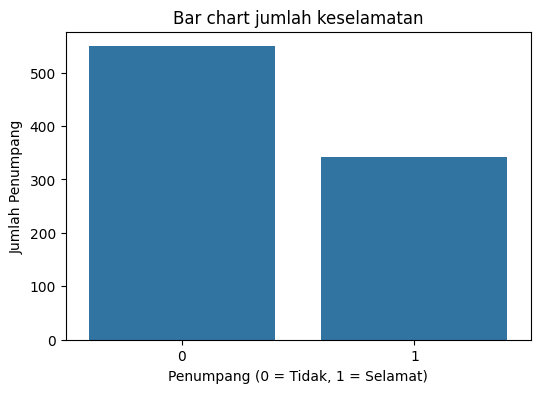

In [5]:
# Bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Bar chart jumlah keselamatan')
plt.xlabel('Penumpang (0 = Tidak, 1 = Selamat)')
plt.ylabel('Jumlah Penumpang')
plt.show()

c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?

In [6]:
# c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?
rata_rata_umur = df['Age'].mean()
print(f"Rata-rata umur penumpang: {rata_rata_umur}")

Rata-rata umur penumpang: 29.69911764705882


In [7]:
# termuda
penumpang_termuda = df.loc[df['Age'].idxmin(), ['Age']]
print("Penumpang termuda:", penumpang_termuda)

Penumpang termuda: Age    0.42
Name: 803, dtype: object


In [8]:
# tertua
penumpang_tertua = df.loc[df['Age'].idxmax(), ['Age']]
print("Penumpang termuda:", penumpang_tertua)

Penumpang termuda: Age    80.0
Name: 630, dtype: object


d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan

Sex
male      577
female    314
Name: count, dtype: int64


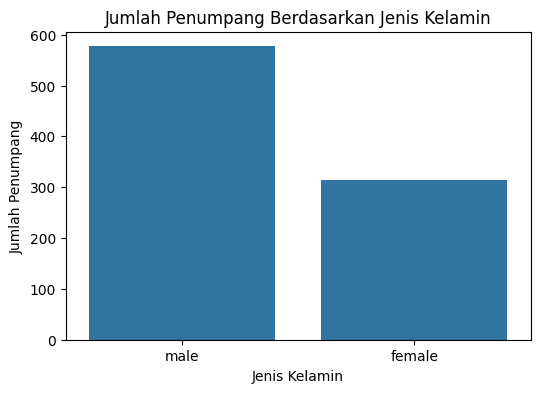

Jumlah penumpang laki-laki lebih banyak


In [9]:
# d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan
gender_counts = df['Sex'].value_counts()
print(gender_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.show()

if gender_counts['male'] > gender_counts['female']:
    print("Jumlah penumpang laki-laki lebih banyak")
elif gender_counts['female'] > gender_counts['male']:
    print("Jumlah penumpang perempuan lebih banyak")
else:
    print("Jumlah penumpang laki-laki dan perempuan sama")

d. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

In [10]:
# d. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan
pclass_counts = df['Pclass'].value_counts()
print(pclass_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [11]:
# total data dikelas 1 dalam bentuk presentase
percentage_pclass1 = (pclass_counts[1] / total_penumpang) * 100
print(f"\nPersentase penumpang di kelas 1: {percentage_pclass1:.2f}%")


Persentase penumpang di kelas 1: 24.24%


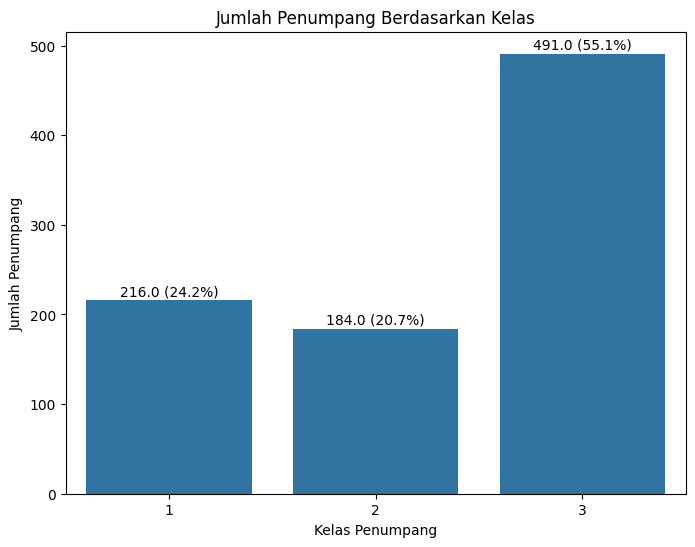

In [12]:
# Bentuk visualisasi
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.xlabel('Kelas Penumpang')
plt.ylabel('Jumlah Penumpang')

# Menambahkan label persentase di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 5, f'{height} ({height/total_penumpang*100:.1f}%)', ha='center')

plt.show()

# 2. Preprocessing

a. Apakah terdapat missing value pada data tersebut?

terdapat missing value:
- Age: 177
- Cabin: 687
- Embarked: 2



In [13]:
# a. Apakah terdapat missing value pada data tersebut?
missing_values = df.isnull().sum()
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


b. Jika ya, apa yang anda lakukan?

Menangani missing value:

- Mengisi Age dengan median.

- Mengisi Embarked dengan modus (nilai yang paling sering muncul).

- Menghapus kolom yang tidak terkait dengan analisi model nantinya

In [22]:
# mengisi missing value dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
# mengisi missing value dengan mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [32]:
# Kolom yang tidak perlu untuk analisis selanjutnya
data = df.drop(columns=['Name', 'Ticket', 'Cabin'])  # hapus kolom
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [38]:
# Encode kolom kategorikal
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # male=1, female=0
data['Embarked'] = le.fit_transform(data['Embarked'])

data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0
